In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [21]:
#Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [22]:
#Metircs
def metrics(model, data, target, cv=skf):
    accuracy = cross_val_score(model, data, target, cv=skf, scoring = 'accuracy', error_score = 'raise').mean()
    precision = cross_val_score(model, data, target, cv=skf, scoring = 'precision_macro', error_score = 'raise').mean()
    recall = cross_val_score(model, data, target, cv=skf, scoring = 'recall_macro', error_score = 'raise').mean()
    f1 = cross_val_score(model, data, target, cv=skf, scoring = 'f1_macro', error_score = 'raise').mean()
    balanced = cross_val_score(model, data, target, cv=skf, scoring = 'balanced_accuracy', error_score = 'raise').mean()
    print(f'Accuracy : \t\t{accuracy}')
    print(f'Precision : \t\t{precision}')
    print(f'Recall : \t\t{recall}')
    print(f'F1 : \t\t\t{f1}')
    print(f'Balanced Accuracy : \t{balanced}')

In [23]:
#MinMaxScaler
def minMax(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scale = scaler.transform(data)

    scaled_df = pd.DataFrame(scale)
    
    return scaled_df

In [24]:
#SMOTE
def smote(data, target):
    smote = SMOTE(random_state=0)
    X_over, y_over = smote.fit_resample(data, target)
    return X_over, y_over

In [25]:
#LogisticRegression
def lr_increaseC(data, target):
    print('Logistic Regression')
    for i in [1,2,4,8,16,32,64,128]:
        print(f'Cost Function: {i}')
        model = LogisticRegression(C=i)
        metrics(model, data, target)

In [26]:
#LGBM
def lgbm_increaseTree(data, target):
    print('LGBM Classifier')
    for i in range(10):
        print(f'Tree: {i}')
        model = LGBMClassifier(n_estimators = (i+1) * 100)
        metrics(model, data, target)

In [27]:
#RandomForest
def rf_increaseTree(data, target):
    print('RandomForest')
    for i in range(10):
        print(f'Tree: {i}')
        model = RandomForestClassifier(n_estimators = (i+1) * 100)
        metrics(model, data, target)

In [28]:
#k-NN
def knn_increaseK(data, target):
    print('k-NN')
    for i in [3,5,7]:
        print(f'k: {i}')
        model = KNeighborsClassifier(n_neighbors=i)
        metrics(model, data, target)

In [29]:
#SVC
def svc_increaseCGamma(data, target):
    print('SVM')
    for i in [1,10,100]:
        for j in [1,10,100]:
            print(f'Cost: {i}')
            print(f'Gamma: {j}')
            model = SVC(C=i, gamma=j)
            metrics(model, data, target)

In [30]:
#Start
def run_models(data, target):
    lr_increaseC(data,target)
    lgbm_increaseTree(data,target)
    rf_increaseTree(data,target)
    knn_increaseK(data,target)
    svc_increaseCGamma(data,target)

In [31]:
def include_processing(X, y):
    print('---------Basic---------')
    run_models(X,y)
    
    print('---------MinMax---------')
    X_scaled = minMax(X)
    run_models(X_scaled, y)
    
    print('---------SMOTE---------')
    X_over, y_over = smote(X_scaled,y)
    run_models(X_over, y_over)

# Binary Classification

## DILI

1    54.447439
0    45.552561
Name: DILI, dtype: float64


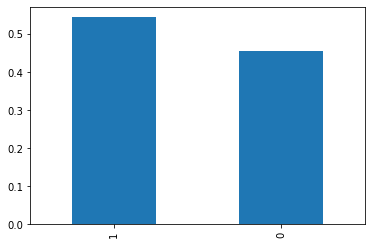

In [32]:
df_raw = pd.read_csv('DILI/final/DILI_GSD.csv') # Need to input Binary class Data
df_raw

df_raw.DILI.value_counts(normalize=True).plot(kind='bar')
print(df_raw.DILI.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
include_processing(X,y)

---------Basic---------
Logistic Regression
Cost Function: 1
Accuracy : 		0.5943447372398851
Precision : 		0.5894545961386235
Recall : 		0.5799959769906764
F1 : 			0.5747369536689464
Balanced Accuracy : 	0.5799959769906764
Cost Function: 2
Accuracy : 		0.5916501234443493
Precision : 		0.5864301262909267
Recall : 		0.5769255911675326
F1 : 			0.5711129900781129
Balanced Accuracy : 	0.5769255911675326
Cost Function: 4
Accuracy : 		0.5889484556859979
Precision : 		0.5837279654544676
Recall : 		0.5747878999971452
F1 : 			0.5696037832035558
Balanced Accuracy : 	0.5747878999971452
Cost Function: 8
Accuracy : 		0.5929954149241699
Precision : 		0.589891751825063
Recall : 		0.5753436645517233
F1 : 			0.5654709657737975
Balanced Accuracy : 	0.5753436645517233
Cost Function: 16
Accuracy : 		0.6046747619287549
Precision : 		0.6015911243537555
Recall : 		0.5901812609152308
F1 : 			0.5848034503125394
Balanced Accuracy : 	0.5901812609152308
Cost Function: 32
Accuracy : 		0.5862528341814884
Precision :

## AMES Mutagenicity

In [ ]:
df_raw = pd.read_csv('AMES Mutagenesis/final/AMES_GSD.csv') # Need to input Binary class Data
categorical_features = ['fr_Al_OH_noTert','fr_COO','fr_NH2','fr_N_O','fr_Ndealkylation2','fr_Nhpyrrole','fr_alkyl_halide','fr_allylic_oxid','fr_lactam']
for var in categorical_features:
    df_raw[var] = df_raw[var].astype("category")
df_raw['Mutagenicity'] = df_raw['Mutagenicity'].astype('category')

df_raw.Mutagenicity.value_counts(normalize=True).plot(kind='bar')
print(df_raw.Mutagenicity.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]
y = y.astype('category')

In [ ]:
include_processing(X,y)

## hERG

In [ ]:
df_raw = pd.read_csv('hERG/final/hERG_GSD.csv') # Need to input Binary class Data
df_raw.hERG.value_counts(normalize=True).plot(kind='bar')
print(df_raw.hERG.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
include_processing(X,y)

# Multi-Class Classification